In [1]:
import numpy as np
import matplotlib.pyplot as plt
import params
import utils
from scipy.integrate import solve_ivp

In [3]:
inits, inits_dict = utils.make_inits(100, [params.init_premirna1]*100, \
                                     [params.init_premirna1_dicer]*100, \
                                     [params.init_mirna1]*100, \
                                     params.init_dicer * 100)

In [5]:
ODEs = utils.makeODEs(inits, [params.ka1]*100, \
                [params.ka_1]*100,
                [params.ka2]*100)

In [7]:
model = utils.makeModel(ODEs)

In [8]:
exec(model)

In [9]:
help(runModel)

Help on function runModel in module __main__:

runModel(t, init_values, ka, kb, kc)
    Function to run model in ODE solver
    
    init_values:    List of initial concentration of free pre-miRNA concentration for
                    each pre-mirna, pre-mirna x dicer concentration, mirna concentration
                    and dicer concentration. Alternating pre-mirna (a), pre-mirna dicer (b),
                    and mirna(c), with final dicer concentration (d), i.e. [a, b, c, a, b, c, d]
    ka:             Array of reaction rates for formation of pre-miR - dicer commplex
    kb:             Array of reaction rates for dissociation of pre-miR - dicer complex
    kc:             Array of reaction rates for catalysis of pre-miR to miR by dicer



In [10]:
res1 = solve_ivp(runModel, (0, int(params.minutes)), inits, \
                 args = ([params.ka1]*100, [params.ka_1]*100, [params.ka2]*100))

In [11]:
dicer_basal = res1.y[-1]
time1 = res1.t

In [12]:
res2 = solve_ivp(runModel, (0, int(params.minutes)), inits, \
                 args = ([params.ka1*10]*100, [params.ka_1]*100, [params.ka2]*100))

In [13]:
dicer_highka = res2.y[-1]
time2 = res2.t

In [14]:
res3 = solve_ivp(runModel, (0, int(params.minutes)), inits, \
                 args = ([params.ka1/10]*100, [params.ka_1]*100, [params.ka2]*100))

In [15]:
dicer_lowka = res3.y[-1]
time3 = res3.t

In [16]:
res4 = solve_ivp(runModel, (0, int(params.minutes)), inits, \
                 args = ([params.ka1]*100, [params.ka_1*10]*100, [params.ka2]*100))

In [18]:
dicer_highkb = res4.y[-1]
time4 = res4.t

In [19]:
res5 = solve_ivp(runModel, (0, int(params.minutes)), inits, \
                 args = ([params.ka1]*100, [params.ka_1/10]*100, [params.ka2]*100))

In [20]:
dicer_lowkb = res5.y[-1]
time5 = res5.t

In [21]:
res6 = solve_ivp(runModel, (0, int(params.minutes)), inits, \
                 args = ([params.ka1]*100, [params.ka_1]*100, [params.ka2*10]*100))

In [22]:
dicer_highkc = res6.y[-1]
time6 = res6.t

In [23]:
res7 = solve_ivp(runModel, (0, int(params.minutes)), inits, \
                 args = ([params.ka1]*100, [params.ka_1]*100, [params.ka2/10]*100))

In [24]:
dicer_lowkc = res7.y[-1]
time7 = res7.t

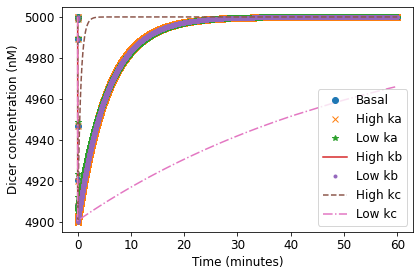

In [26]:
fig = plt.figure()
plt.rc('font', size=12)
ax = plt.subplot()

ax.plot(time1, dicer_basal, "o")
ax.plot(time2, dicer_highka, "x")
ax.plot(time3, dicer_lowka, "*")
ax.plot(time4, dicer_highkb, "-")
ax.plot(time5, dicer_lowkb, ".")
ax.plot(time6, dicer_highkc, "--")
ax.plot(time7, dicer_lowkc, "-.")

ax.legend(["Basal", "High ka", "Low ka", "High kb", "Low kb", "High kc", "Low kc"])
ax.set_xlabel("Time (minutes)")
ax.set_ylabel("Dicer concentration (nM)")

plt.tight_layout()

fig.savefig(r'./figures/dynamic_model(1a).svg', dpi=600, bbox_inches = 'tight')

plt.show()


In [ ]:
fig = plt.figure()
plt.rc('font', size=12)
ax1 = plt.subplot(3, 3, 1)
ax1.plot(time1, dicer_basal, "o")

ax2 = plt.subplot(3, 3, 2)
ax2.plot(time2, dicer_highka, "x")

ax3 = plt.subplot(3, 3, 3)
ax3.plot(time3, dicer_lowka, "*")

ax4 = plt.subplot(3, 3, 4)
ax4.plot(time4, dicer_highkb, "-")

ax5 = plt.subplot(3, 3, 5)
ax5.plot(time5, dicer_lowkb, ".")

ax6 = plt.subplot(3, 3, 6)
ax6.plot(time6, dicer_highkc, "--")

ax7 = plt.subplot(3, 3, 7)
ax7.plot(time7, dicer_lowkc, "-.")

ax.legend(["Basal", "High ka", "Low ka", "High kb", "Low kb", "High kc", "Low kc"])
ax.set_xlabel("Time (minutes)")
ax.set_ylabel("Dicer concentration (nM)")

plt.tight_layout()

fig.savefig(r'./figures/dynamic_model(1ba).svg', dpi=600, bbox_inches = 'tight')

plt.show()

In [28]:
import pandas as pd

In [30]:
df1 = pd.DataFrame({"time_basal": time1, "dicer_basal": dicer_basal})
df2 = pd.DataFrame({"time_highka": time2, "dicer_highka": dicer_highka})
df3 = pd.DataFrame({"time_lowka": time3, "dicer_lowka": dicer_lowka})
df4 = pd.DataFrame({"time_highkb": time4, "dicer_highkb": dicer_highkb})
df5 = pd.DataFrame({"time_lowkb": time5, "dicer_lowkb": dicer_lowkb})
df6 = pd.DataFrame({"time_highkc": time6, "dicer_highkc": dicer_highkc})
df7 = pd.DataFrame({"time_lowkc": time7, "dicer_lowkc": dicer_lowkc})